<a href="https://colab.research.google.com/github/Siuuuuuu0/ML-DL/blob/main/UCI_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from google.colab import files

In [65]:
files.upload()
df = pd.read_csv('UCI_Credit_Card.csv')
models_accs = {}
models_cms = {}
models_auc = {}
models_scores = {}
df.head()

Saving UCI_Credit_Card.csv to UCI_Credit_Card (2).csv


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [66]:
df.rename({'default.payment.next.month' : 'DEFAULT'}, axis='columns', inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [67]:
df.drop("ID", axis="columns", inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [68]:
df.dtypes

,0
LIMIT_BAL,float64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64
PAY_5,int64


In [69]:
for name in ['SEX', 'EDUCATION', 'MARRIAGE', ]:
  print(df[name].unique())

#https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
# SEX: Gender (1=male, 2=female)
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# MARRIAGE: Marital status (1=married, 2=single, 3=others)

# Assuming 0 for Education&Marriage is missing data

[2 1]
[2 1 3 5 4 6 0]
[1 2 3 0]


In [70]:
df_new = df.loc[(df['MARRIAGE']!=0) & (df['EDUCATION']!=0)]

In [71]:
df.shape, df_new.shape

((30000, 24), (29932, 24))

In [72]:
df_default = df_new[df_new['DEFAULT']==1]
df_no_default = df_new[df_new['DEFAULT']==0]

In [73]:
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=52)
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=52)

In [74]:
df_downsampled = pd.concat([df_no_default_downsampled, df_default_downsampled])

In [75]:
X = df_downsampled.drop('DEFAULT', axis='columns').copy()
y = df_downsampled['DEFAULT'].copy()

In [76]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
8229,500000.0,1,1,1,42,0,0,0,0,0,...,597415.0,569034.0,551702.0,568638.0,25624.0,21898.0,20851.0,19599.0,26000.0,20000.0
25271,80000.0,2,2,2,25,0,0,0,0,0,...,77657.0,70105.0,39751.0,14765.0,75004.0,3096.0,1887.0,1081.0,2044.0,0.0
17770,50000.0,2,2,2,53,0,0,0,0,0,...,50095.0,34120.0,33235.0,32377.0,1952.0,1979.0,1495.0,1144.0,1165.0,946.0
29327,90000.0,1,1,2,27,0,0,0,0,0,...,15783.0,16815.0,17236.0,17807.0,1600.0,2000.0,1600.0,1000.0,1000.0,1000.0
28651,160000.0,2,2,1,36,-1,-1,-1,-1,-1,...,805.0,666.0,740.0,539.0,206.0,886.0,679.0,740.0,539.0,0.0


In [77]:
y.head()

,DEFAULT
8229,0
25271,0
17770,0
29327,0
28651,0


In [78]:
X_encoded = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
8229,500000.0,42,580928.0,597793.0,597415.0,569034.0,551702.0,568638.0,25624.0,21898.0,...,False,False,False,True,False,False,False,False,False,False
25271,80000.0,25,80115.0,77427.0,77657.0,70105.0,39751.0,14765.0,75004.0,3096.0,...,False,False,False,True,False,False,False,False,False,False
17770,50000.0,53,51320.0,50602.0,50095.0,34120.0,33235.0,32377.0,1952.0,1979.0,...,False,False,False,True,False,False,False,False,False,False
29327,90000.0,27,21506.0,18304.0,15783.0,16815.0,17236.0,17807.0,1600.0,2000.0,...,False,False,False,True,False,False,False,False,False,False
28651,160000.0,36,2447.0,206.0,805.0,666.0,740.0,539.0,206.0,886.0,...,False,False,True,False,False,False,False,False,False,False


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=52)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

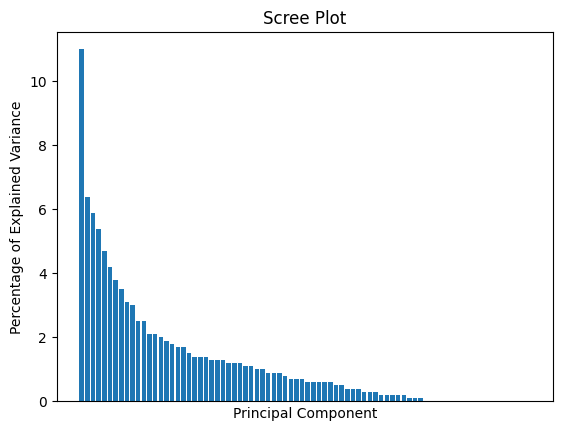

In [80]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.tick_params(
    axis="x",
    which="both",
    bottom=False,
    top=False,
    labelbottom=False
)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [81]:
accs_var = []
accs = []

n_components = [0.8, 0.85, 0.9, 0.95, 0.99, 2, 5, 10, 15, 20, 23]

for n in n_components:
  pca = PCA(n)
  X_pca = pca.fit_transform(X_train_scaled)
  clf_svm = SVC(random_state=52, C=1, gamma="scale", kernel="rbf")
  clf_svm.fit(X_pca, y_train)
  acc = accuracy_score(y_test, clf_svm.predict(pca.transform(X_test_scaled)))
  if n <= 1:
    accs_var.append(acc)
  else:
    accs.append(acc)

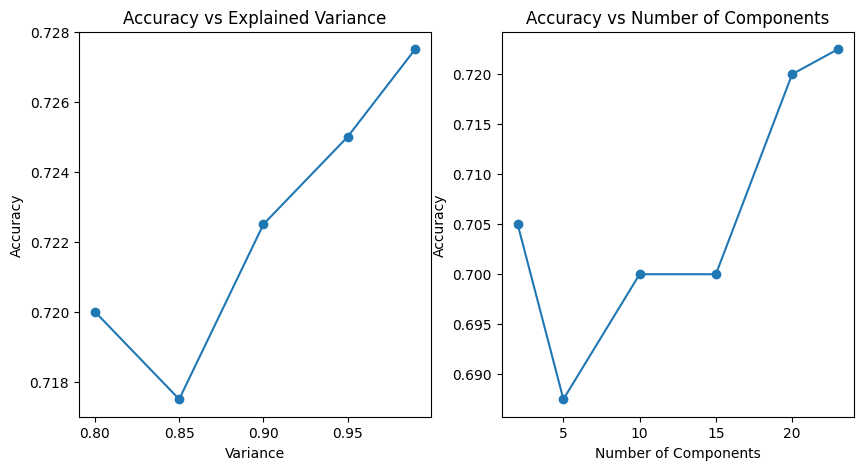

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(n_components[:len(accs_var)], accs_var, marker='o')
axes[0].set_xlabel("Variance")
axes[0].set_ylabel("Accuracy")

axes[1].plot(n_components[len(accs_var):], accs, marker='o')
axes[1].set_xlabel("Number of Components")
axes[1].set_ylabel("Accuracy")

axes[0].set_title("Accuracy vs Explained Variance")
axes[1].set_title("Accuracy vs Number of Components")

plt.show()

In [83]:
clf_svm = SVC(random_state=52)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=52)

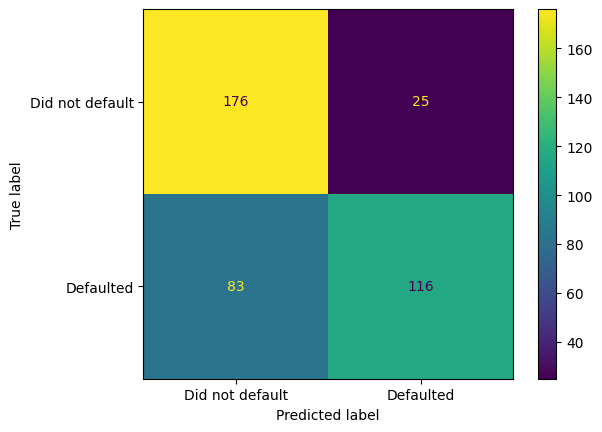

In [84]:
ConfusionMatrixDisplay(confusion_matrix(y_test, clf_svm.predict(X_test_scaled)), display_labels=["Did not default", "Defaulted"]).plot()

In [85]:
param_grid = [
    {"C" : [0.5, 1, 10, 100],
     "gamma" : ['scale', 1, 0.1, 0.001, 0.0001],
     "kernel" : ["rbf", "poly"]
     }
]

optimal_params = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
optimal_params.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.001, 0.0001],
                          'kernel': ['rbf', 'poly']}],
             scoring='accuracy')

In [86]:
print(optimal_params.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


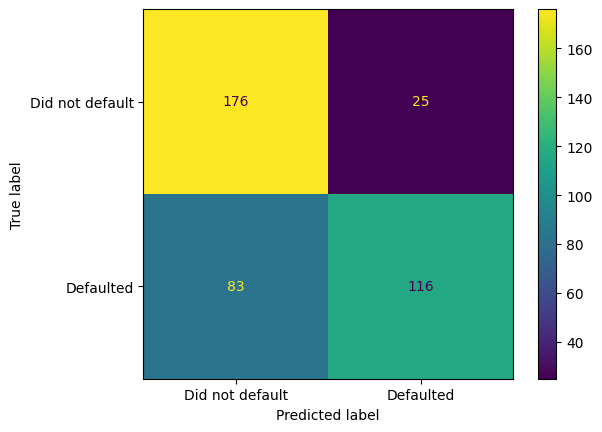

In [98]:
clf_svm = optimal_params.best_estimator_
clf_svm.fit(X_train_scaled, y_train)
y_pred = clf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
models_cms["Logistic Regression"]=(cm)
models_accs["Logistic Regression"]=(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(cm, display_labels=["Did not default", "Defaulted"]).plot()

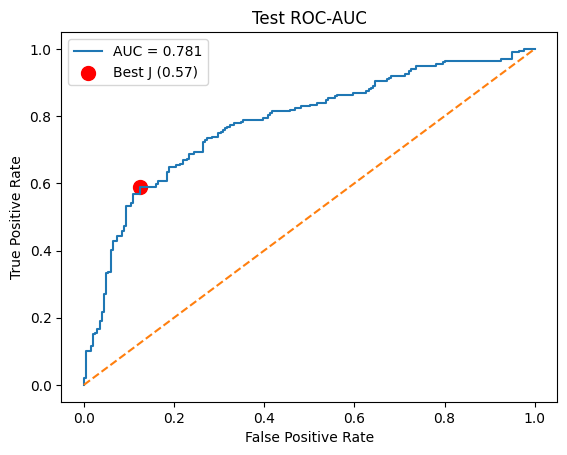

In [99]:
y_pred_proba = clf_svm.predict_proba(X_test_scaled)[:,1]
test_auc = roc_auc_score(y_test, y_pred_proba)
train_auc = roc_auc_score(y_train, clf_svm.predict_proba(X_train_scaled)[:,1])

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

models_auc["Logistic Regression"] = {"fpr":fpr, "tpr":tpr, "thresholds":thresholds}

J = tpr - fpr
best_idx = np.argmax(J)
best_fpr = fpr[best_idx]
best_tpr = tpr[best_idx]
best_threshold = thresholds[best_idx]

plt.plot(fpr, tpr, label=f"AUC = {test_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.scatter(best_fpr, best_tpr, color='red', s=100, label=f"Best J ({best_threshold:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("Test ROC-AUC")
plt.show()

In [100]:
cv_auc = cross_val_score(clf_svm, X_train_scaled, y_train, cv=5, scoring='roc_auc')
models_scores["Logistic Regression"] = {"CV AUC":cv_auc, "Test AUC":test_auc, "Train AUC":train_auc}
print(cv_auc)

[0.7196875  0.7828125  0.76125    0.77050781 0.8037814 ]


In [101]:
mask = fpr <= 0.1
best_idx = np.argmax(tpr[mask])
best_threshold = thresholds[mask][best_idx]
models_scores["Logistic Regression"]["AUC 0.1 FPR"] = best_threshold
mask = tpr >= 0.9
best_idx = np.argmin(fpr[mask])
best_threshold = thresholds[mask][best_idx]
models_scores["Logistic Regression"]["AUC 0.9 TPR"] = best_threshold

In [102]:
param_grid = [
  {
    "max_depth": [3, 5, 7, 10, 20, 23],
    "min_samples_leaf": [1, 5, 10, 20, 50],
  }
]

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=52),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


In [103]:
tree = grid.best_estimator_
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=52)

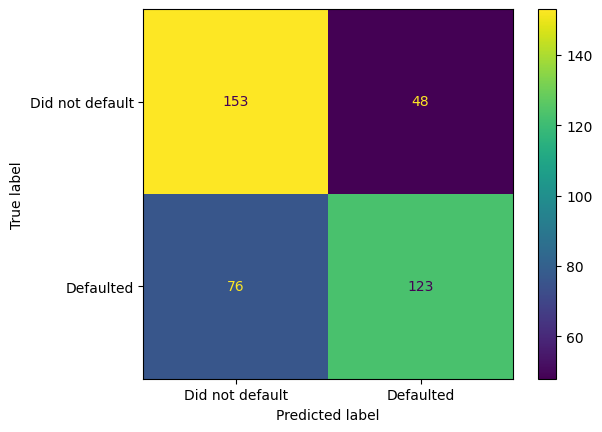

In [104]:
y_pred = tree.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
models_cms["Decision Tree"]=(cm)
models_accs["Decision Tree"]=(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(cm, display_labels=["Did not default", "Defaulted"]).plot()

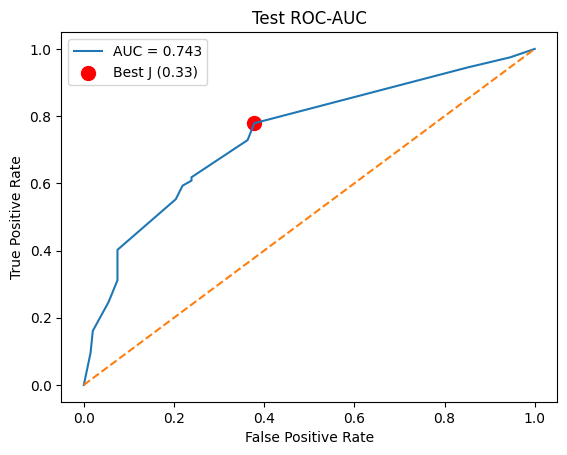

In [105]:
y_pred_proba = tree.predict_proba(X_test_scaled)[:,1]
test_auc = roc_auc_score(y_test, y_pred_proba)
train_auc = roc_auc_score(y_train, tree.predict_proba(X_train_scaled)[:,1])

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

models_auc["Decision Tree"] = {"fpr":fpr, "tpr":tpr, "thresholds":thresholds}

J = tpr - fpr
best_idx = np.argmax(J)
best_fpr = fpr[best_idx]
best_tpr = tpr[best_idx]
best_threshold = thresholds[best_idx]

plt.plot(fpr, tpr, label=f"AUC = {test_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.scatter(best_fpr, best_tpr, color='red', s=100, label=f"Best J ({best_threshold:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("Test ROC-AUC")
plt.show()

In [106]:
cv_auc = cross_val_score(clf_svm, X_train_scaled, y_train, cv=5, scoring='roc_auc')
models_scores["Decision Tree"] = {"CV AUC":cv_auc, "Test AUC":test_auc, "Train AUC":train_auc}
print(cv_auc)

[0.7196875  0.7828125  0.76125    0.77050781 0.8037814 ]


In [107]:
mask = fpr <= 0.1
best_idx = np.argmax(tpr[mask])
best_threshold = thresholds[mask][best_idx]
models_scores["Decision Tree"]["AUC 0.1 FPR"] = best_threshold
mask = tpr >= 0.9
best_idx = np.argmin(fpr[mask])
best_threshold = thresholds[mask][best_idx]
models_scores["Decision Tree"]["AUC 0.9 TPR"] = best_threshold

In [108]:
models_scores

{'Logistic Regression': {'CV AUC': array([0.7196875 , 0.7828125 , 0.76125   , 0.77050781, 0.8037814 ]),
  'Test AUC': np.float64(0.7809945248631216),
  'Train AUC': np.float64(0.8525794571554017),
  'AUC 0.1 FPR': np.float64(0.6763313276613144),
  'AUC 0.9 TPR': np.float64(0.2969476695633247)},
 'Decision Tree': {'CV AUC': array([0.7196875 , 0.7828125 , 0.76125   , 0.77050781, 0.8037814 ]),
  'Test AUC': np.float64(0.7433310832770819),
  'Train AUC': np.float64(0.7959332748957421),
  'AUC 0.1 FPR': np.float64(0.8313253012048193),
  'AUC 0.9 TPR': np.float64(0.27405857740585776)}}

ПЕРЕПИСАТЬ

Если банк хочет контролировать FPR (не допустить кредит дефолтщику) -> Decision Tree лучше, потому что при FPR <= 0.1 она ловит больше дефолтщиков (TPR выше в этом диапазоне)

Если банк хочет общую производительность без жёстких ограничений -> Logistic Regression выигрывает